In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from ydata_profiling import ProfileReport
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("wine-clustering.csv")
df.head(10)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   
5    14.20        1.76  2.45          15.2        112           3.27   
6    14.39        1.87  2.45          14.6         96           2.50   
7    14.06        2.15  2.61          17.6        121           2.60   
8    14.83        1.64  2.17          14.0         97           2.80   
9    13.86        1.35  2.27          16.0         98           2.98   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735  
5   2.85     1450  
6   3.58     1290  
7   3.58     1295  
8   2.85     1045  
9   3.55     1045

In [3]:
profile = ProfileReport(df, title = "Profile Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render HTML: 100%|██████████| 1/1 [00:04<00:00,  4.04s/it]


# Statistical Analysis

In [4]:
# Function for outlier detection
def outlier(x):  # Calculating Quartiles
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3 - q1  # Calculating the IQR
    lower_fence = q1 - 1.5 * iqr # Calculating the lower fence 
    upper_fence = q3 + 1.5 * iqr # Calculating the upper fence
    

    non_outlier = []  # If datapoint falls within the upper and lower fence its considered a non_outlier
    for num in x:
        if num >= lower_fence and num <= upper_fence:
            non_outlier.append(num)
    lower_whisker = np.min(non_outlier) # The lower and upper whiskers are calculated as the minimum and maximum values within the non_outlier list, respectively.
    upper_whisker = np.max(non_outlier)
    
    
    outlier = [] # If datapoint doesn't fall within the upper and lower fence its considered an outlier
    for num in x:
        if num < lower_fence or num > upper_fence:
            outlier.append(num)
    
    outlier_count = len(outlier)
    
    print('lower_whisker: {}'.format(lower_whisker))
    print('upper_whisker: {}'.format(upper_whisker))
    print('outlier counts: {}'.format(outlier_count))

1. Alcohol


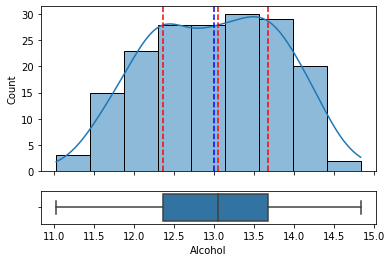

 
lower_whisker: 11.03
upper_whisker: 14.83
outlier counts: 0
 
Data not skewed
 
Data not normal
--------------------------------------------------
 
2. Malic_Acid


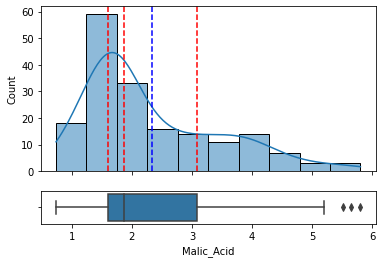

 
lower_whisker: 0.74
upper_whisker: 5.19
outlier counts: 3
 
Data skewed with skew: 4.948252332987905
 
Data not normal
--------------------------------------------------
 
3. Ash


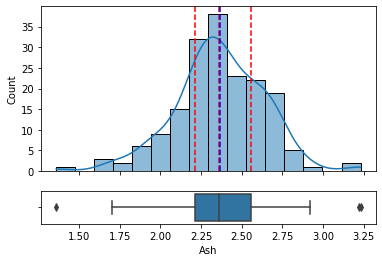

 
lower_whisker: 1.7
upper_whisker: 2.92
outlier counts: 3
 
Data not skewed
 
Data not normal
--------------------------------------------------
 
4. Ash_Alcanity


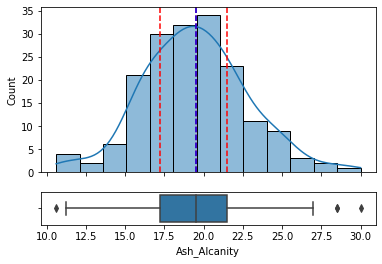

 
lower_whisker: 11.2
upper_whisker: 27.0
outlier counts: 4
 
Data not skewed
 
Data normal
--------------------------------------------------
 
5. Magnesium


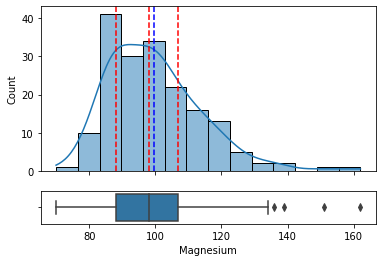

 
lower_whisker: 70
upper_whisker: 134
outlier counts: 4
 
Data skewed with skew: 5.156209543976354
 
Data not normal
--------------------------------------------------
 
6. Total_Phenols


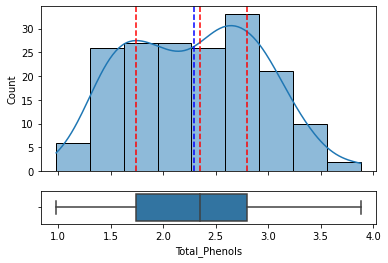

 
lower_whisker: 0.98
upper_whisker: 3.88
outlier counts: 0
 
Data not skewed
 
Data not normal
--------------------------------------------------
 
7. Flavanoids


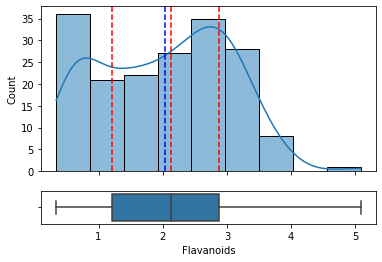

 
lower_whisker: 0.34
upper_whisker: 5.08
outlier counts: 0
 
Data not skewed
 
Data not normal
--------------------------------------------------
 
8. Nonflavanoid_Phenols


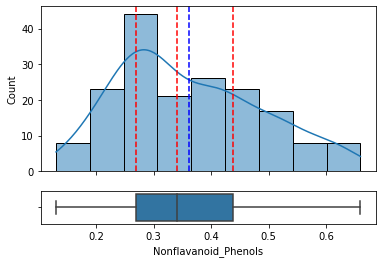

 
lower_whisker: 0.13
upper_whisker: 0.66
outlier counts: 0
 
Data skewed with skew: 2.424692186948588
 
Data not normal
--------------------------------------------------
 
9. Proanthocyanins


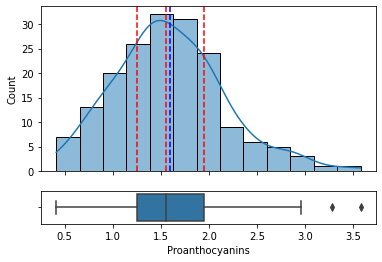

 
lower_whisker: 0.41
upper_whisker: 2.96
outlier counts: 2
 
Data skewed with skew: 2.753458698973807
 
Data not normal
--------------------------------------------------
 
10. Color_Intensity


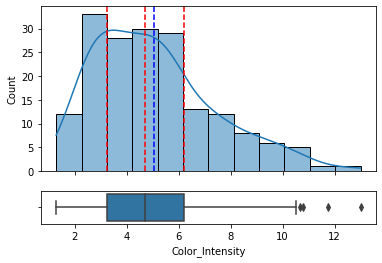

 
lower_whisker: 1.28
upper_whisker: 10.52
outlier counts: 4
 
Data skewed with skew: 4.299552967255505
 
Data not normal
--------------------------------------------------
 
11. Hue


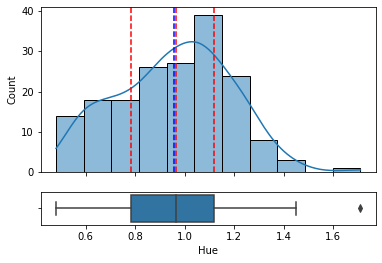

 
lower_whisker: 0.48
upper_whisker: 1.45
outlier counts: 1
 
Data not skewed
 
Data normal
--------------------------------------------------
 
12. OD280


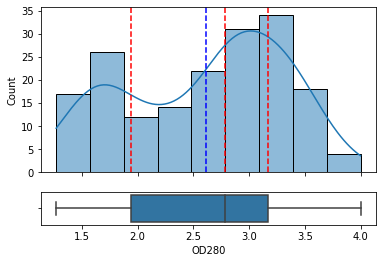

 
lower_whisker: 1.27
upper_whisker: 4.0
outlier counts: 0
 
Data not skewed
 
Data not normal
--------------------------------------------------
 
13. Proline


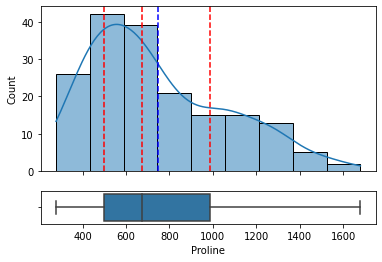

 
lower_whisker: 278
upper_whisker: 1680
outlier counts: 0
 
Data skewed with skew: 3.8867615156802664
 
Data not normal
--------------------------------------------------
 


In [5]:
# Re-sampled data
# Univariate Analysis
# Finding the count, mean, std, min, Q1, Q2, Q3, max for each column. In addition to finding the outlier counts in each column, how much the data is skewed-
# and if the data adopts a normal distribution or not.


y = 1 # Keeping track of the num of loops
# List to store normally distributed columns
norm_data = [] 

# Loop through numerical columns
for x in df:
    print(f'{y}. {x}')
    
    # Create subplots for histogram and box plot
    fig, ax = plt.subplots(2, 1, sharex = True, gridspec_kw = {'height_ratios':[5,1]})
    
    # Histogram with percentiles and mean lines
    sns.histplot(data = df, x = x, kde = True, ax = ax[0])
    ax[0].axvline(np.nanpercentile(df[x], 25), c='red', linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 50), c='red', linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 75), c='red', linestyle='--')
    ax[0].axvline(np.mean(df[x]), c = 'blue', linestyle = '--')
    
    # Box plot
    sns.boxplot(data = df, x = x, ax = ax[1])
    ax[1].set_xlabel(f'{x}')
    plt.show()
    
    # Outlier detection
    print(' ')
    outlier(df[x])
    
    # Skewness test
    print(' ')
    sk, pval = st.skewtest(df[x])
    if pval < 0.05:
        print(f'Data skewed with skew: {sk}')
    else:
        print(f'Data not skewed')
    
    # Normality test
    print(' ')
    norm, pval = st.normaltest(df[x])
    if pval < 0.05:
        print(f'Data not normal')
    else:
        print(f'Data normal')
        norm_data.append(x)
    
    print('-' * 50)
    print(' ')
    y += 1

# Addressing Outliers (Winsorization)

In [6]:
# Malic_Acid
upper_whisker = 5.19 
lower_whisker = 0.74   

# Winsorize 'Malic_Acid'
df['Malic_Acid'] = np.where(df['Malic_Acid'] > upper_whisker, upper_whisker, df['Malic_Acid'])
df['Malic_Acid'] = np.where(df['Malic_Acid'] < lower_whisker, lower_whisker, df['Malic_Acid'])

In [7]:
# Ash
upper_whisker = 2.92
lower_whisker = 1.7   

# Winsorize 'Ash'
df['Ash'] = np.where(df['Ash'] > upper_whisker, upper_whisker, df['Ash'])
df['Ash'] = np.where(df['Ash'] < lower_whisker, lower_whisker, df['Ash'])

In [8]:
# Ash_Alcanity
upper_whisker = 27.0
lower_whisker = 11.2   

# Winsorize 'Ash_Alcanity'
df['Ash_Alcanity'] = np.where(df['Ash_Alcanity'] > upper_whisker, upper_whisker, df['Ash_Alcanity'])
df['Ash_Alcanity'] = np.where(df['Ash_Alcanity'] < lower_whisker, lower_whisker, df['Ash_Alcanity'])

In [9]:
# Magnesium
upper_whisker = 134
lower_whisker = 70  

# Winsorize 'Magnesium'
df['Magnesium'] = np.where(df['Magnesium'] > upper_whisker, upper_whisker, df['Magnesium'])
df['Magnesium'] = np.where(df['Magnesium'] < lower_whisker, lower_whisker, df['Magnesium'])

In [10]:
# Proanthocyanins
lower_whisker: 0.41
upper_whisker: 2.96 

# Winsorize 'Proanthocyanins'
df['Proanthocyanins'] = np.where(df['Proanthocyanins'] > upper_whisker, upper_whisker, df['Proanthocyanins'])
df['Proanthocyanins'] = np.where(df['Proanthocyanins'] < lower_whisker, lower_whisker, df['Proanthocyanins'])

In [11]:
# Color_Intensity
lower_whisker: 1.28
upper_whisker: 10.52 

# Winsorize 'Color_Intensity'
df['Color_Intensity'] = np.where(df['Color_Intensity'] > upper_whisker, upper_whisker, df['Color_Intensity'])
df['Color_Intensity'] = np.where(df['Color_Intensity'] < lower_whisker, lower_whisker, df['Color_Intensity'])

In [12]:
# Hue
lower_whisker: 0.48
upper_whisker: 1.45 

# Winsorize 'Color_Intensity'
df['Hue'] = np.where(df['Hue'] > upper_whisker, upper_whisker, df['Hue'])
df['Hue'] = np.where(df['Hue'] < lower_whisker, lower_whisker, df['Hue'])

# Data Scaling & Modeling

In [13]:
# Initialize the MinMax Scalar
scaler = StandardScaler()
# Fit and transform the data
X_scaled = scaler.fit_transform(df)
data_scaled = pd.DataFrame(X_scaled, columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
                                                'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
                                                'Color_Intensity', 'Hue', 'OD280', 'Proline'])

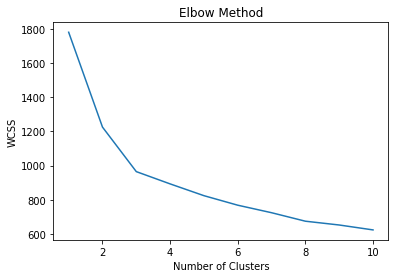

In [14]:
# Finding the best-fit number of clusters using WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


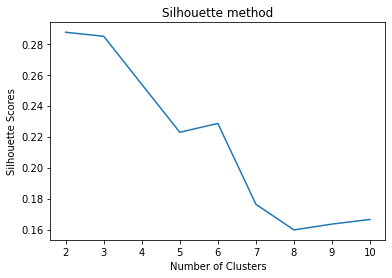

In [15]:
# Finding the best-fit number of clusters using Silhouette. 
# Best fit cluster = cluster with highest Silhouette.
Silhouette_Scores = []

for cluster in range(2, 11):
    k3 = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    k3.fit(data_scaled)
    Silhouette_Scores.append(silhouette_score(data_scaled, k3.labels_))

# Plot
plt.plot(range(2, 11), Silhouette_Scores)
plt.title('Silhouette method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.show()

In [16]:
# Initializing a K-means custering model using 3 clusters based on results obtained from both methods (WCSS & Silhouette)
k = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [17]:
cluster_labels = k.labels_
# Silhouette Score
silhouette_avg = silhouette_score(data_scaled, cluster_labels)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data_scaled, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.28477823574925026
Davies-Bouldin Index: 1.4134530775642726


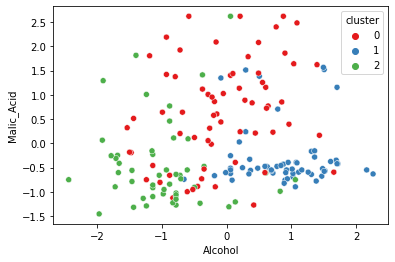

In [18]:
#visualizing the clusters
#we'll use the first two features
data_scaled['cluster'] = k.labels_

#plotting the clusters
sns.scatterplot(x = 'Alcohol', y = 'Malic_Acid', hue = 'cluster', data = data_scaled, palette = 'Set1')
plt.show()